In [40]:
import context;
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
import anabatic_flow_v9 as anfl;
from IPython.display import Image

# Anabatic Flow Numerical Simulation

    Andrew Loeppky
    ATSC 409 Final Project
    Spring 2020

# Outline:

- Quick background
- Mathematical/physical model
- Solving the equations numerically
- Running the simulation (results may vary)

# Background: Thermally Driven Slope Flow

- Temperature forcing at surface generates slope parallel wind

- Surface heating causes upslope wind (anabatic), cooling causes downslope (katabatic)

- Operate at a variety of scales from small hills to entire continents



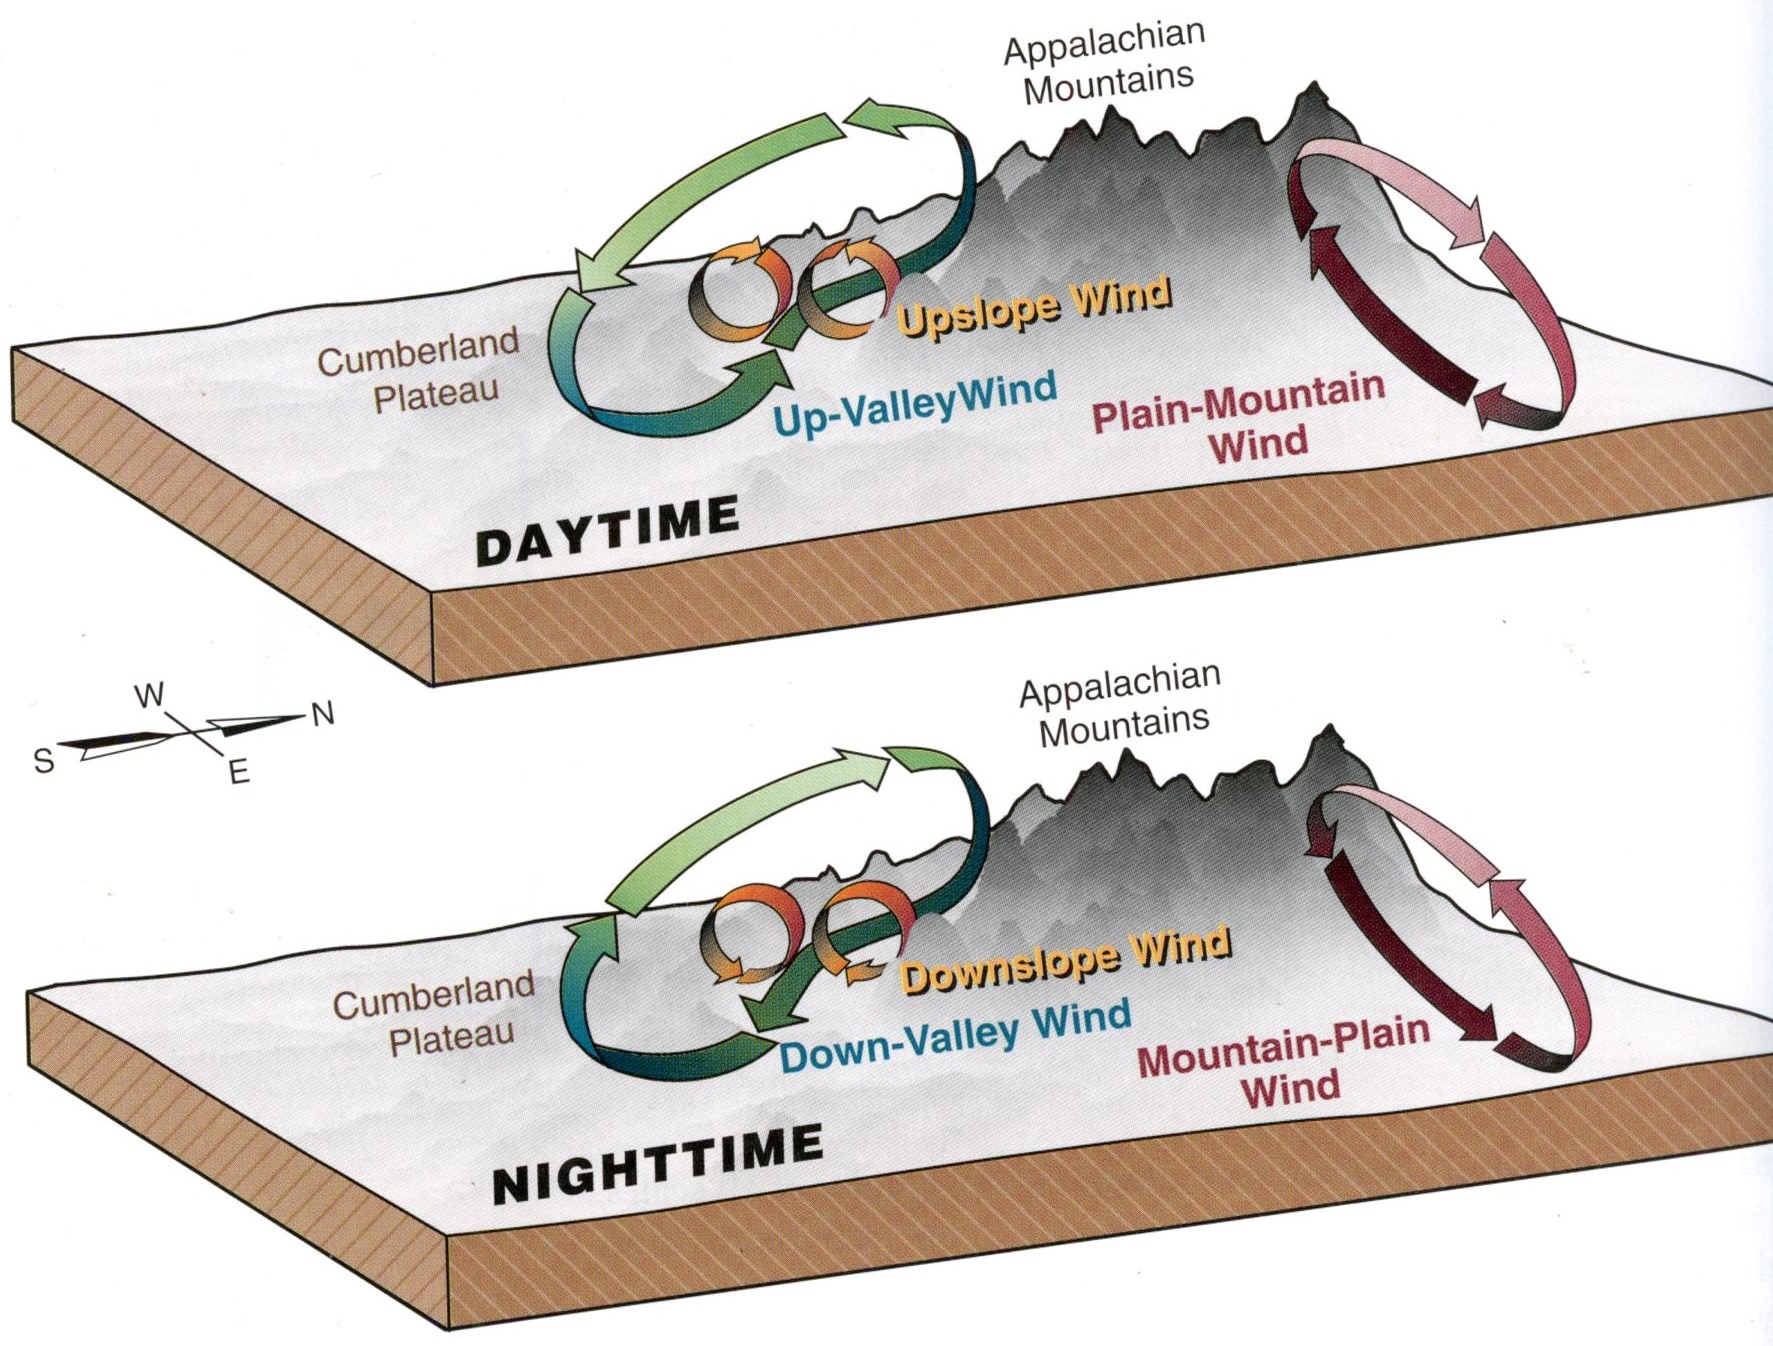

In [36]:
Image('C:/Users/Owner/UBC2020/num_methods/final_presentation/whiteman_slopeflow.jpg', width=800)
#Source: (Whiteman, 2000)

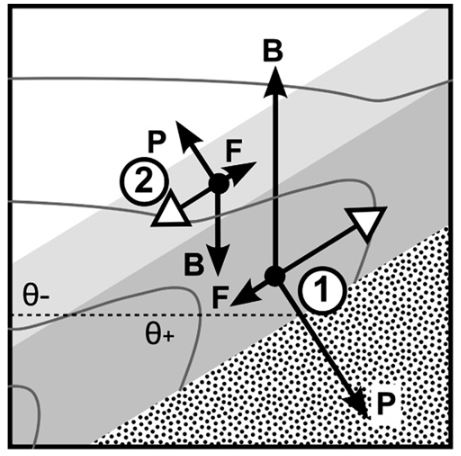

In [24]:
Image('C:/Users/Owner/UBC2020/num_methods/final_presentation/slope_fbd.JPG')
#Source: (Serafin and Zardi 2010, after Prandtl)

### This model is parameterized at the "slope" scale
     
      Depth of the surface layer is 10s of meters
      
      Velocity on the order of a few meters per second
      
      Temperature anomaly ~5K


# The Math

Consider an infinite slope, rotated counterclockwise in the $xz$ plane by angle $\beta$. $s$ denotes the along slope direction, and $n$ slope normal. Velocity $u$ is defined as $\frac{ds}{dt}$. Define $\theta$ as the surface potential temperature anomaly, the local temp difference from the background temp.


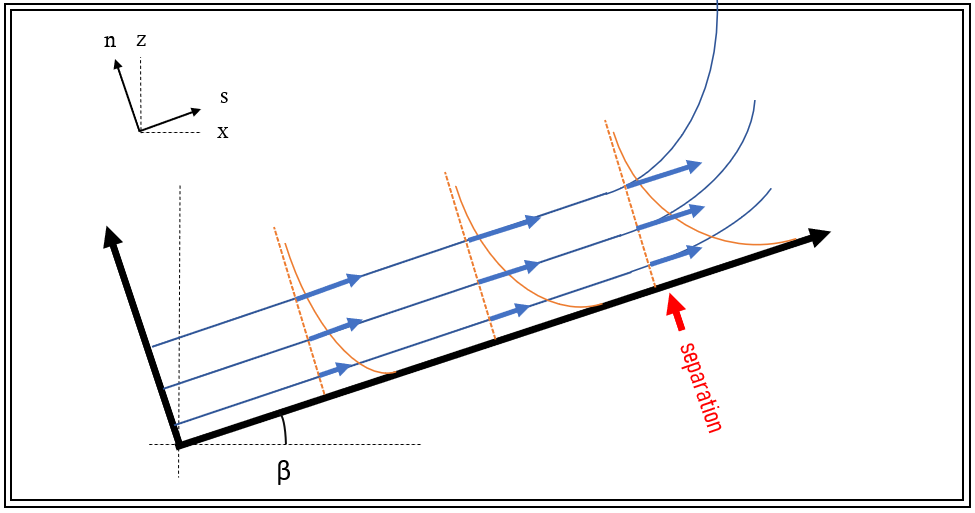

In [28]:
Image('C:/Users/Owner/UBC2020/num_methods/coord_sketch409.PNG')
#Source: Author, after (Hocut et al 2015)

The system is described by a pair of coupled linear 2nd order PDEs:

$$
\frac{\partial u}{\partial t} = \theta \frac{N^2}{\gamma}sin(\beta) + K_m\frac{\partial^2 u}{\partial n^2}
$$

$$
\frac{\partial \theta}{\partial t} = -u\gamma sin(\beta) + K_h\frac{\partial^2 \theta}{\partial n^2}
$$

where $\gamma$ is the lapse rate, $N$ is the Brunt-Vaisala frequency $\sqrt{\gamma g / \theta_0}$.
$$
$$
<center>
    $\theta \frac{N^2}{\gamma}sin(\beta)$ = buoyancy of a parcel; $\uparrow$ buoyancy, $\uparrow$ u
    $$
    $$
    $-u\gamma sin(\beta)$  = advection of warm/cold air
    $$
    $$
    $K_m\frac{\partial^2 u}{\partial n^2}$ = turbulent diffusion of $u$ velocity, diffusion constant $K_m$
    $$
    $$
    $K_h\frac{\partial^2 \theta}{\partial n^2}$ = turbulent diffusion of $\theta$, diffusion constant $K_h$

 

# Boundary Conditions

no slip surface condition $\rightarrow u(t,0) = 0$

far away from hill $\rightarrow u(t,\infty) = 0$

surface temperature forcing $\rightarrow \theta(t,0) = \Theta$ 

far from the hill $\rightarrow \theta(t,\infty) = 0$

# Initial Conditions

Start from zero and let the model "spin up"

$$
u(0,n) = 0
$$

$$
\theta(0,n) = 0
$$


# Assumptions (1)


Turbulent diffusion of $u$ velocity and $\theta$ parameterized by "zero order K theory"

$$
\overline{u'w'} = -K_m\frac{\partial u}{\partial n}
$$

$$
\overline{\theta'w'} = -K_h\frac{\partial \theta}{\partial n}
$$

Where $K_m$ and $K_h$ are the eddy viscosity and diffusivity representing the size of turbulent eddies. Simplest parameterization possible:

$$
K_m = K_h \approx 3
$$

"not the best parameterization" 
(Stull, Boundary Layer Meteorology, 1988)

# Assumptions (2)

Boundary conditions require that:

$$
u(t,\infty) = 0 
$$

$$
\theta(t,\infty) = 0
$$

On a finite grid:

$$
150m \approx \infty
$$

$$
$$

# Numerical Methods

A number of schemes available for diffusion-type problems, each with their own benefits and drawbacks

### Simplest Approach - Forward in Time, Centered in Space (FTCS)
Future value depends on present self and nearest neighbours.

- Pros: Extremely simple to implement

- Cons: Expensive. Stability constraint $\Delta t = \frac{\Delta n^2}{2K}$

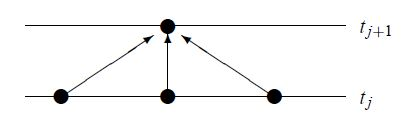

In [38]:
Image('C:/Users/Owner/UBC2020/num_methods/final_presentation/ftcs.jpg')
#source: https://www.uni-muenster.de/imperia/md/content/physik_tp/lectures/ws2016-2017/num_methods_i/heat.pdf

### FTCS

Numerical version of $u$ equation:
$$
\bar{u}_i^{j+1} = u_i^j + \bar{\theta}\Delta t\frac{N^2}{\gamma}sin(\beta) + \frac{K_m\Delta t}{\Delta n^2}(\bar{u}_{i+1}^j - 2\bar{u}_i^j + \bar{u}_{i-1}^j)
$$

and for $\theta$:
$$
\bar{\theta}_i^{j+1} = \bar{\theta}_i^j - \bar{u}\Delta t\gamma sin(\beta) + \frac{K_h\Delta t}{\Delta n^2}(\bar{\theta}_{i+1}^j - 2\bar{\theta}_i^j + \bar{\theta}_{i-1}^j)
$$

### DuFort-Frankel Method
Future Values depend on past self and present neighbours

- Pros: Unconditionally stable for pure diffusion
- Cons: Adding in coupled terms produces this:


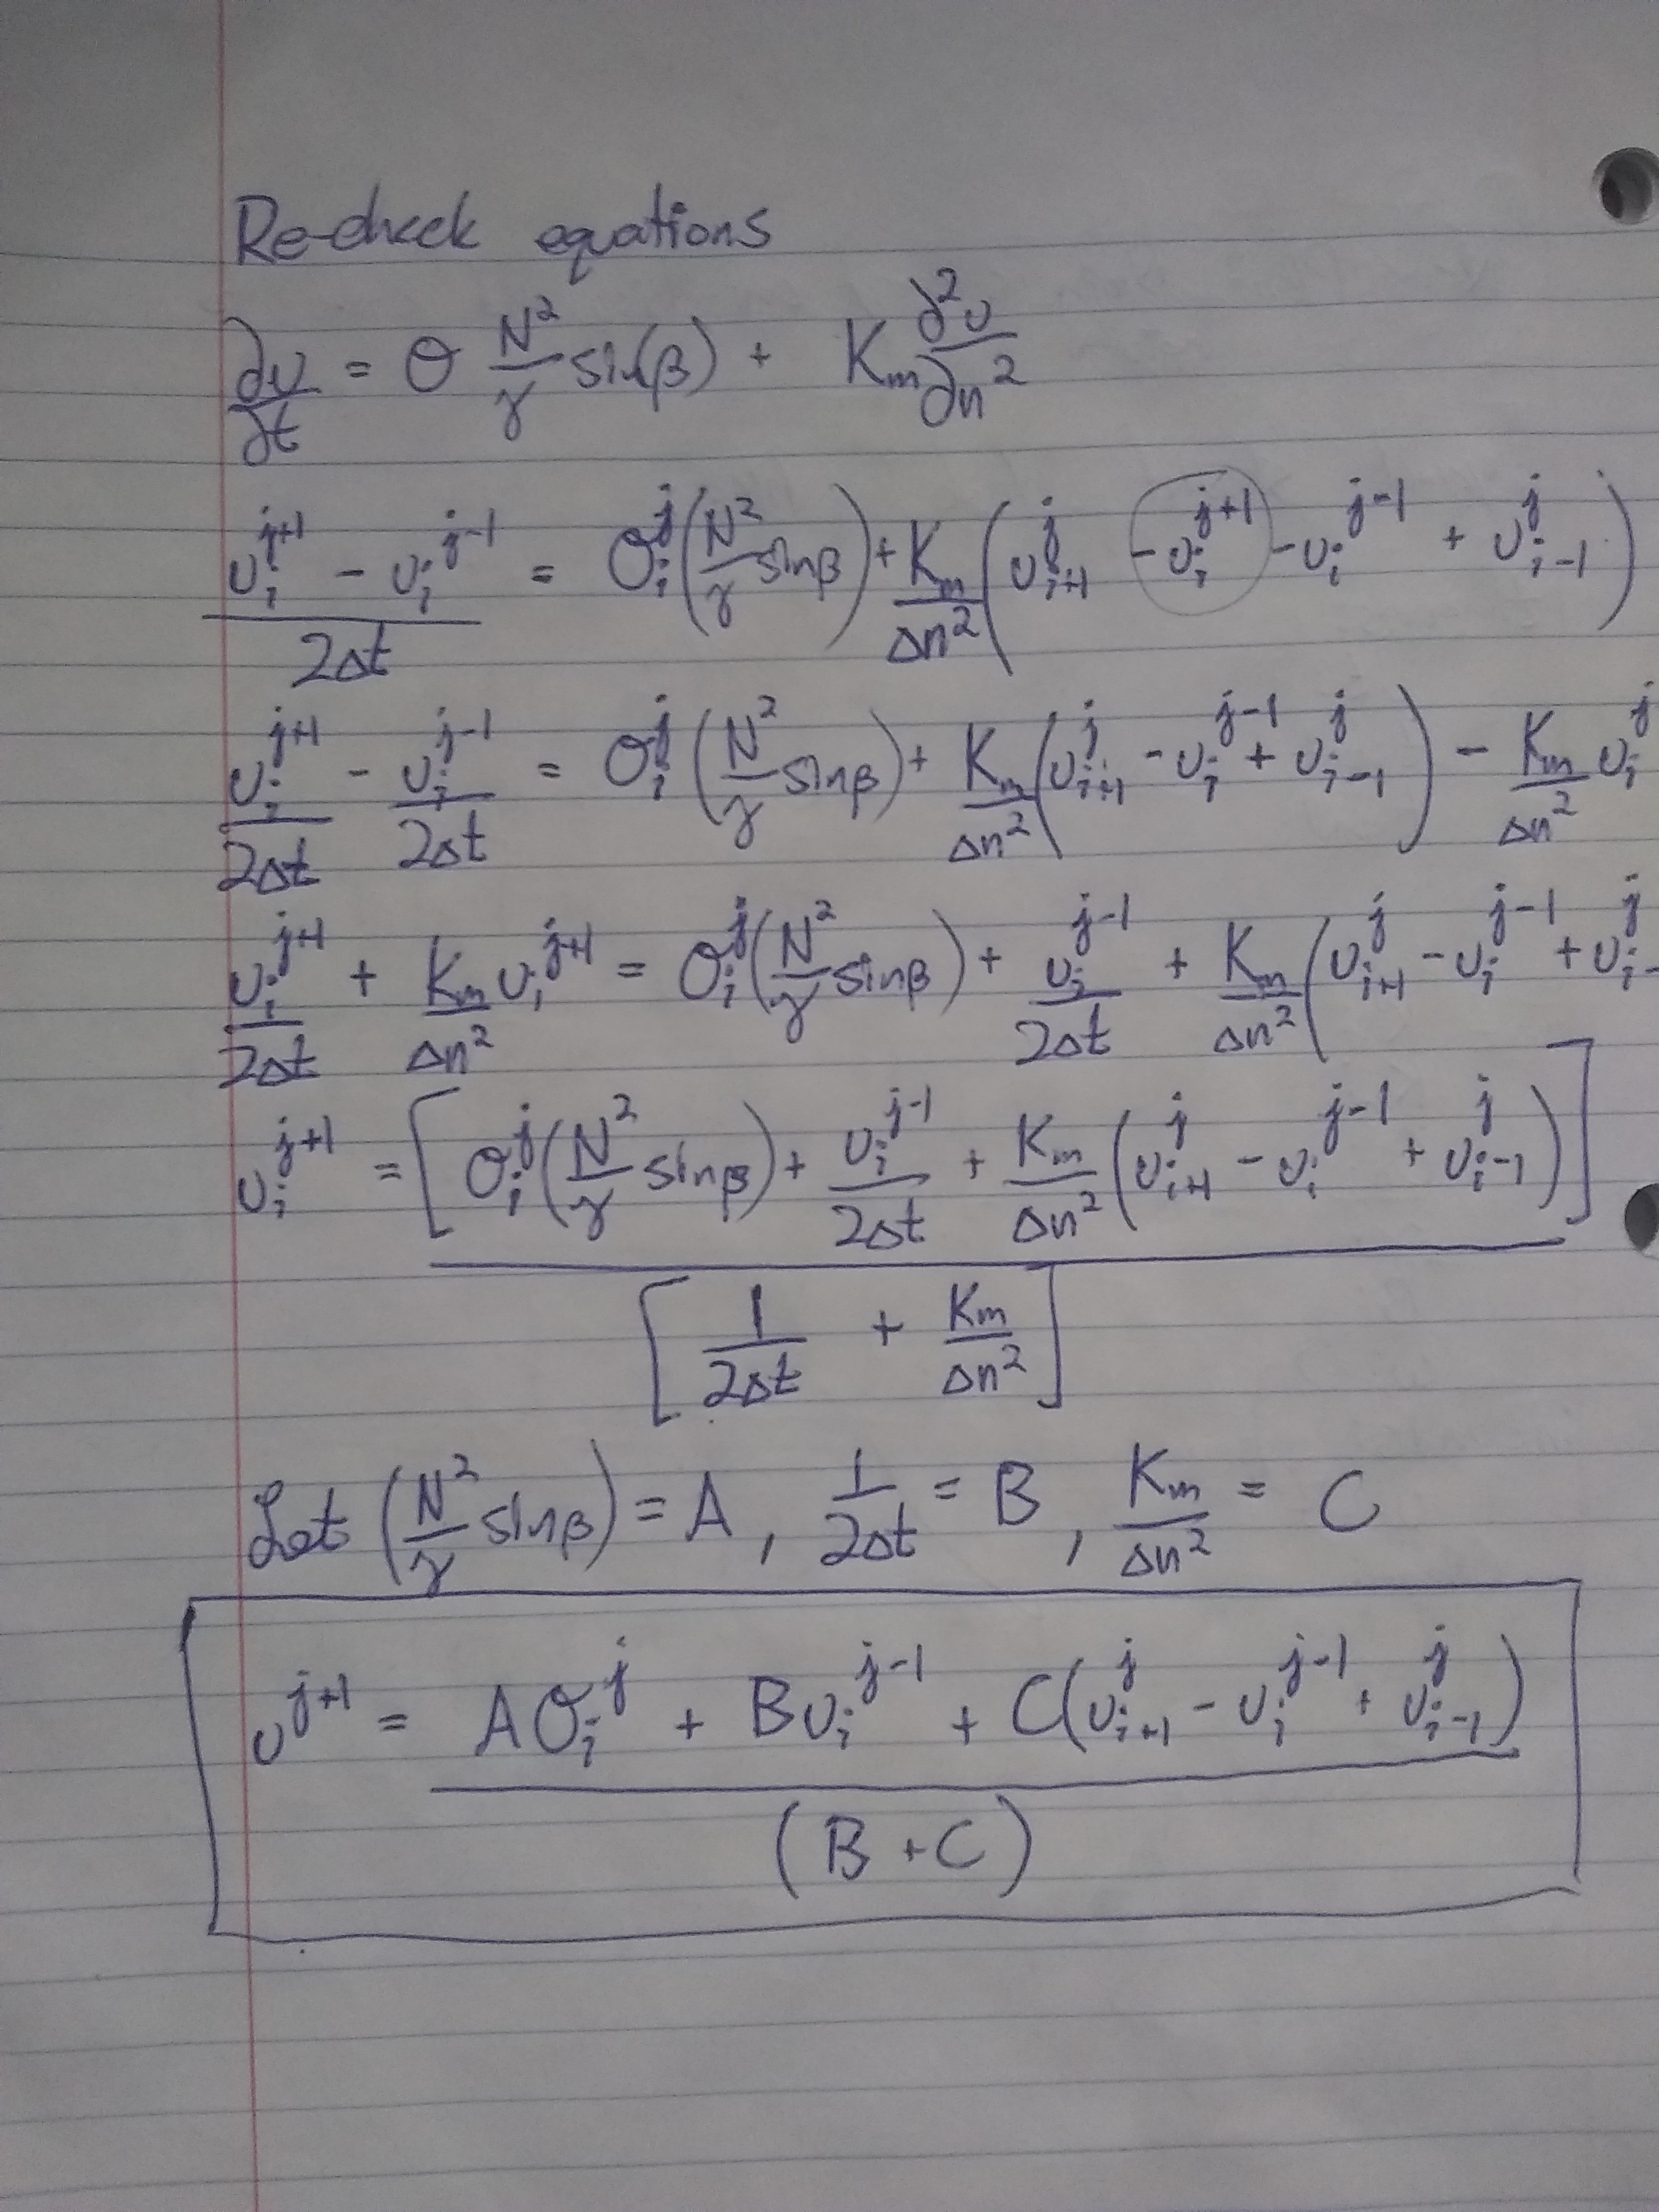

In [37]:
Image('C:/Users/Owner/UBC2020/num_methods/final_presentation/dff_mess.JPG', width=500)

### Crank-Nicholson
Implicit scheme where future values depend on current $+ \frac{1}{2}\Delta t$ values. Produces an $n \times n$ matrix.

- Pros: Unconditionally stable and accurate to higher order than FTCS and DFF
- Cons: Most complex to implement in code

<center>
    ** Start with the simple method! ** 
</center>

# Results
### Case 1) Spin up to steady state
Implement the FTCS method in Python and solve for the steady state with constant surface forcing $\Theta$.
   
    dt: 0.04
    tend: 1000.
    dn: 0.5
    nend: 150.
    Km: 3.
    Kh: 3.


Grid size: (25000, 301)


<Figure size 432x288 with 0 Axes>

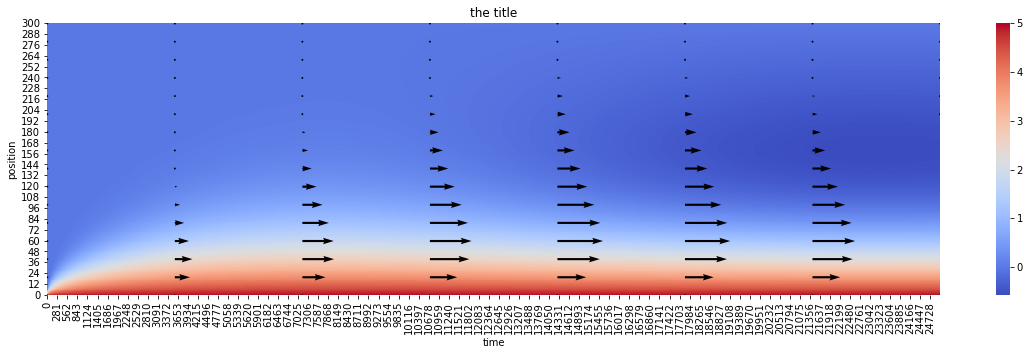

In [39]:
#Steady state, numerical sim
steady_state_num = anfl.Integrator('anabatic_spin_up.yaml','ftcs')
u_ss_num, theta_ss_num = steady_state_num.solve_eqns()
steady_state_num.make_plot(u_ss_num[::100], theta_ss_num[::100])

### Case 2) Sin(wt) Surface Forcing
Try something more realistic. The sun comes up at $t=0$ and heats the surface to a maximum of $+5K$. At night, the mountainside radiatively cools to $-5K$.

Grid size: (250, 301)


<Figure size 432x288 with 0 Axes>

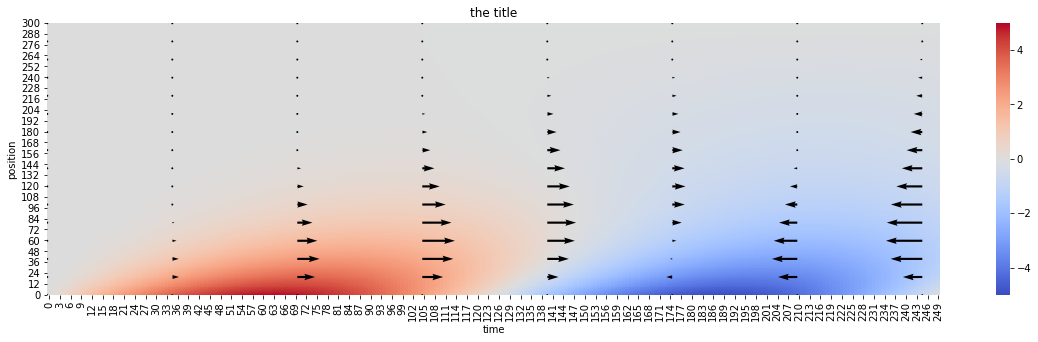

In [41]:
#Numerical sin forcing
sin_force_num = anfl.Integrator('anabatic_1_day.yaml', 'ftcs', forcing = 'diurnal')
u_sf_num, theta_sf_num = sin_force_num.solve_eqns()
sin_force_num.make_plot(u_sf_num[::100], theta_sf_num[::100])

# Analytical Solutions
Both these cases were solved analytically by Prandtl (1942) and Defant (1949). How does the simulation hold up? Calculate the exact fields and find the error:

$$
u_{err} = u_{exact} - u_{numeric}
$$

$$
\theta_{err} = \theta_{exact} - \theta_{numeric}
$$

In [42]:
#solve exact fields for steady state
prandtl_exact = anfl.Integrator('anabatic_spin_up.yaml', 'ext_prandtl')
u_prandtl, theta_prandtl = prandtl_exact.solve_eqns()

#solve exact fields for sin(wt) forcing
defant_exact = anfl.Integrator('anabatic_1_day.yaml', 'ext_defant', forcing = 'diurnal')
u_dfxt, theta_dfxt = defant_exact.solve_eqns()

#error in steady state 
u_err_ss = u_prandtl - u_ss_num
theta_err_ss = theta_prandtl - theta_ss_num

#error in sin(wt) forcing
u_err_sf = u_dfxt - u_sf_num
theta_err_sf = theta_dfxt - theta_sf_num

Grid size: (250, 301)


<Figure size 432x288 with 0 Axes>

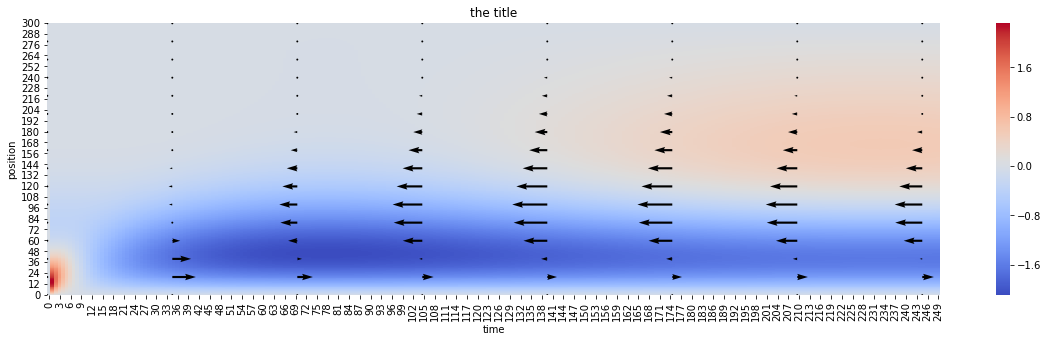

Grid size: (250, 301)


<Figure size 432x288 with 0 Axes>

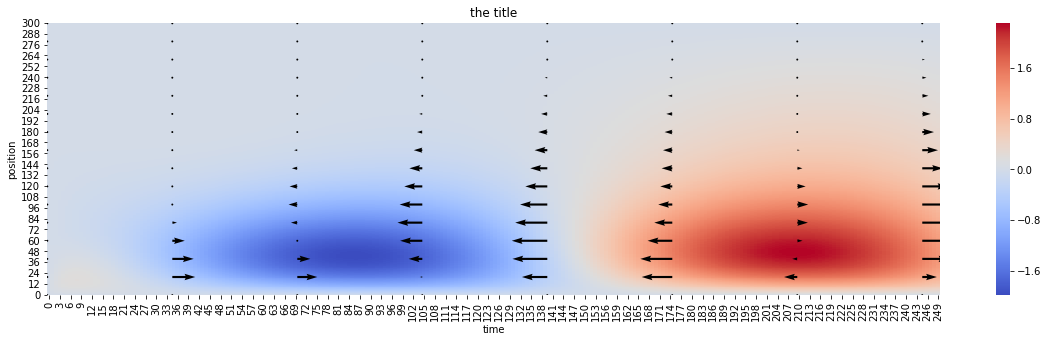

In [43]:
#print out both error plots
prandtl_exact.make_plot(u_err_ss[::100], theta_err_ss[::100])
sin_force_num.make_plot(u_err_sf[::100], theta_err_sf[::100])

# Numerical Diffusion
The error is as high as 40% in the worst parts of the time series. This is due to "numerical diffusion," where the truncation error has the effect of increasing the effective diffusion constant.

### Tune the model:
$$
K' = K \cdot K_{numeric}
$$

For the steady state case I reduced the "physical" $K$ from $3.0$ to $0.8$

In [44]:
#Re-run model with a smaller diffusion constant chosen to minimize the error.
ss_num_fixed = anfl.Integrator('anabatic_corrected_k.yaml','ftcs')
u_ss_fixed, theta_ss_fixed = ss_num_fixed.solve_eqns()

u_err = u_prandtl - u_ss_fixed
theta_err = theta_prandtl - theta_ss_fixed

Grid size: (25000, 301)


<Figure size 432x288 with 0 Axes>

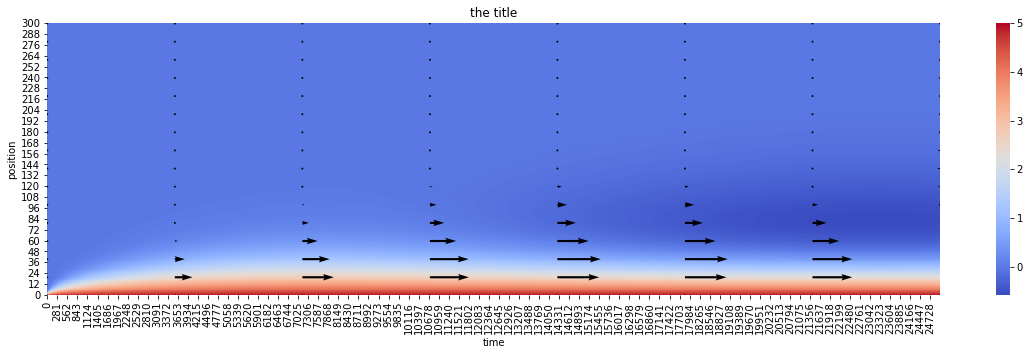

Grid size: (25000, 301)


<Figure size 432x288 with 0 Axes>

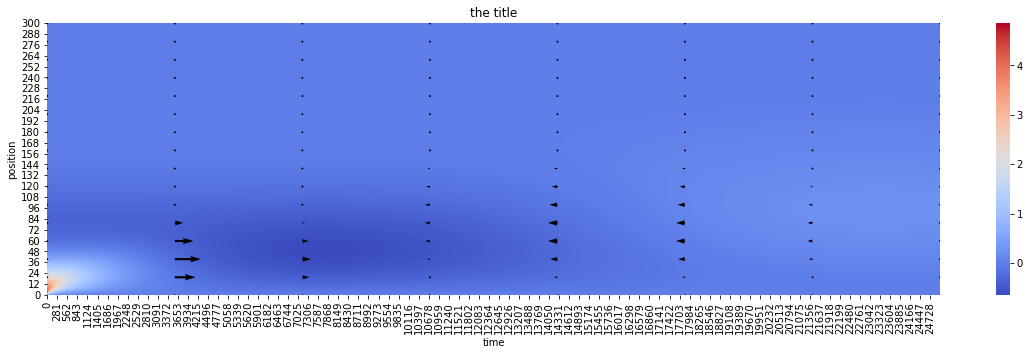

In [45]:
ss_num_fixed.make_plot(u_ss_fixed[::100], theta_ss_fixed[::100])
prandtl_exact.make_plot(u_err[::100], theta_err[::100])

# Optimized Model
Numerical diffusion is actually beneficial in this case. Recall the stability condition for FTCS

$$
\Delta t < \frac{\Delta n^2}{2K}
$$

is dependent on $K$. For this model, numerical diffusion is responsible for $73\%$ of $K'$, so I get to increase the timestep proportionally. Note as well, the more realistic eddy viscosity makes the anabatic layer thinner, so I can lower the "ceiling" from $150m$ to $80m$. The new grid size is decreased by a factor of $7.5$!

# "Realistic" Variations
Now that we have a faster, calibrated model, we can specify any forcing we like and see how the system responds.

# Clouds
Fair weather cumulus clouds periodically block the sun, causing a square-wave periodic temperature signal at the surface. When the sun is out, $\Theta = 8K$. When a cloud is present, $\Theta = 2k$

Grid size: (667, 161)


<Figure size 432x288 with 0 Axes>

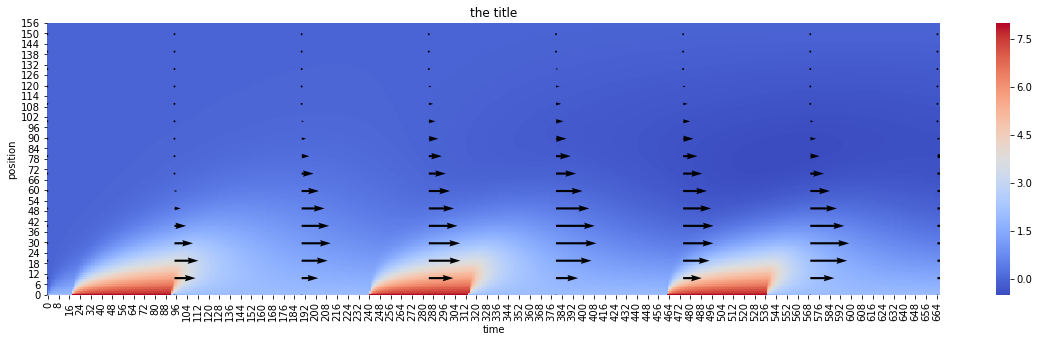

In [47]:
#Initialize an integrator in "clouds" mode
clouds_sim = anfl.Integrator('anabatic_calibrated.yaml', 'ftcs', forcing='clouds')
u_clouds, theta_clouds = clouds_sim.solve_eqns()
clouds_sim.make_plot(u_clouds[::10], theta_clouds[::10])

# Storm
From $t=330$ to $t=660$, a synoptic storm rolls in, forcing the wind speed at $u=-10m/s$. After the storm, the sun returns and resumes heating the slope.

Grid size: (6666, 161)


<Figure size 432x288 with 0 Axes>

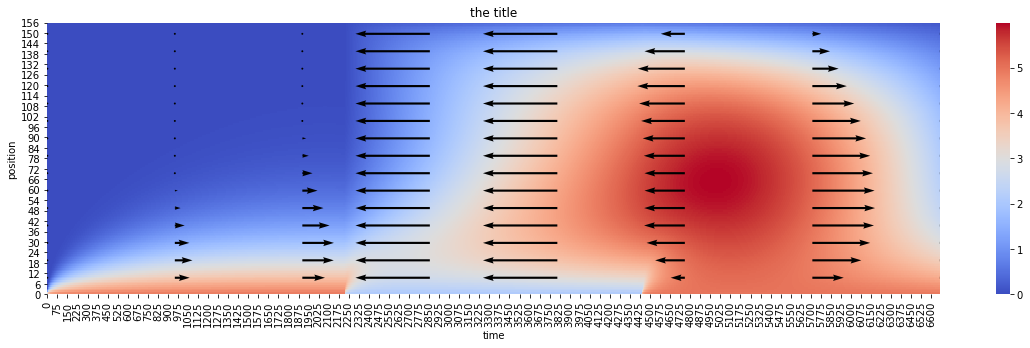

In [48]:
#Initialize an integrator in "storm" mode
storm_sim = anfl.Integrator('anabatic_calibrated.yaml', 'ftcs', forcing='storm')
u_storm, theta_storm = storm_sim.solve_eqns()
storm_sim.make_plot(u_storm, theta_storm)

# Fire
At $t = 500s$, a lightning strike causes a fire which rapidly engulfs the slope and increases the surface temperature to $500K$ above the background! 

In [51]:
#It broke my normal plotter. Special fire plotter:
def plot_fire(u_fire, theta_fire):
    fire_time = np.arange(0,u_fire.shape[0],10)
    temp_surf = theta_fire[::10,0]
    temp_10m = theta_fire[::10,20]
    temp_20m = theta_fire[::10,40]
    temp_50m = theta_fire[::10,100]

    wind_1m = u_fire[::10,1]
    wind_10m = u_fire[::10,20]
    wind_20m = u_fire[::10,40]
    wind_50m = u_fire[::10,100]


    fig, ax = plt.subplots(1,2, figsize=(15,5))
    #temp
    ax[0].plot(fire_time, temp_surf, label='surface')
    ax[0].plot(fire_time, temp_10m, label='10m')
    ax[0].plot(fire_time, temp_20m, label='20m')
    ax[0].plot(fire_time, temp_50m, label='50m')

    ax[0].legend(loc='upper right')
    ax[0].set_xlabel('time')
    ax[0].set_ylabel('Temperature Anomaly (K)')
    ax[0].set_title('Temperature Profiles')

    #wind
    ax[1].plot(fire_time, wind_1m, label='1m')
    ax[1].plot(fire_time, wind_10m, label='10m')
    ax[1].plot(fire_time, wind_20m, label='20m')
    ax[1].plot(fire_time, wind_50m, label='50m')

    ax[1].legend()
    ax[1].set_xlabel('time')
    ax[1].set_ylabel('Wind Speed (m/s)')
    ax[1].set_title('Wind Speed Profiles')

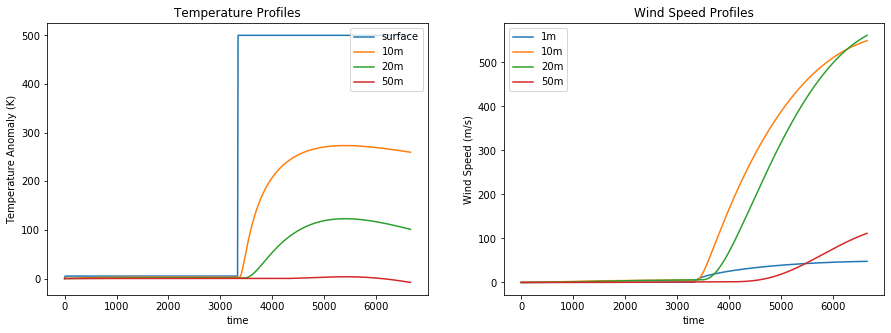

In [52]:
#Initialize an integrator in "fire" mode
fire_sim = anfl.Integrator('anabatic_calibrated.yaml', 'ftcs', forcing='fire')
u_fire, theta_fire = fire_sim.solve_eqns()
plot_fire(u_fire, theta_fire)

# Improvements

- Make it faster. Higher order discretizations exist with less strict bounds on stability
$$
$$
- More realistic, higher order $K$ theory to modulate fluxes of $u$ and $\theta$





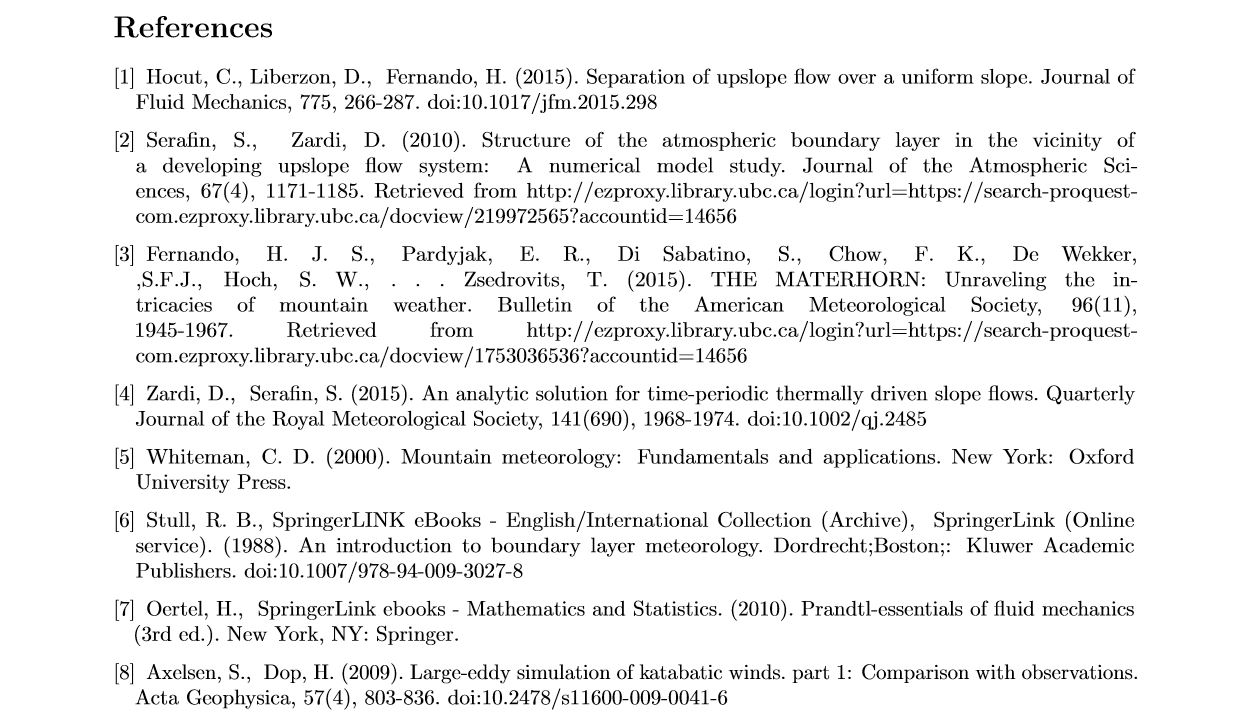

In [55]:
Image('C:/Users/Owner/UBC2020/num_methods/final_presentation/bib.JPG')

# Github
<center>
    https://github.com/AndrewLoeppky/ATSC409
